# Image classification

## Import TensorFlow and other libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import zipfile
!unzip /geusters.zip

Streaming output truncated to the last 5000 lines.
  inflating: geusters/4/✋-!-9.jpg  
  inflating: __MACOSX/geusters/4/._✋-!-9.jpg  
  inflating: geusters/4/✋-!-423.jpg  
  inflating: __MACOSX/geusters/4/._✋-!-423.jpg  
  inflating: geusters/4/✋-!-345.jpg  
  inflating: __MACOSX/geusters/4/._✋-!-345.jpg  
  inflating: geusters/4/✋-!-351.jpg  
  inflating: __MACOSX/geusters/4/._✋-!-351.jpg  
  inflating: geusters/4/✋-!-437.jpg  
  inflating: __MACOSX/geusters/4/._✋-!-437.jpg  
  inflating: geusters/4/✋-!-379.jpg  
  inflating: __MACOSX/geusters/4/._✋-!-379.jpg  
  inflating: geusters/4/✋-!-378.jpg  
  inflating: __MACOSX/geusters/4/._✋-!-378.jpg  
  inflating: geusters/4/✋-!-350.jpg  
  inflating: __MACOSX/geusters/4/._✋-!-350.jpg  
  inflating: geusters/4/✋-!-436.jpg  
  inflating: __MACOSX/geusters/4/._✋-!-436.jpg  
  inflating: geusters/4/✋-!-422.jpg  
  inflating: __MACOSX/geusters/4/._✋-!-422.jpg  
  inflating: geusters/4/✋-!-344.jpg  
  inflating: __MACOSX/geusters/4/._✋-!-344.jp

## Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

It's good practice to use a validation split when developing your model. Let's use 80% of the images for training, and 20% for validation.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "geusters",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4867 files belonging to 5 classes.
Using 3894 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/geusters",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4867 files belonging to 5 classes.
Using 973 files for validation.


You can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.

In [ ]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4']


## Visualize the data

Here are the first nine images from the training dataset:

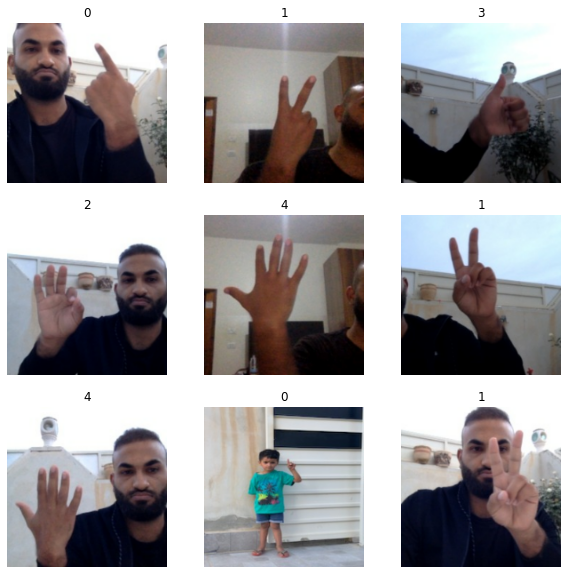

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.999834


In [ ]:
num_classes = 5

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## Train the model

In [ ]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
122/122 [==============================] - 124s 1s/step - loss: 0.9537 - accuracy: 0.6484 - val_loss: 0.5363 - val_accuracy: 0.8222
Epoch 2/30
122/122 [==============================] - 122s 1s/step - loss: 0.3089 - accuracy: 0.9001 - val_loss: 0.3098 - val_accuracy: 0.8849
Epoch 3/30
122/122 [==============================] - 122s 1s/step - loss: 0.1421 - accuracy: 0.9515 - val_loss: 0.2745 - val_accuracy: 0.9229
Epoch 4/30
122/122 [==============================] - 122s 1s/step - loss: 0.0605 - accuracy: 0.9825 - val_loss: 0.2690 - val_accuracy: 0.9250
Epoch 5/30
122/122 [==============================] - 122s 1s/step - loss: 0.0234 - accuracy: 0.9949 - val_loss: 0.3918 - val_accuracy: 0.9270
Epoch 6/30
122/122 [==============================] - 122s 1s/step - loss: 0.0123 - accuracy: 0.9972 - val_loss: 0.2968 - val_accuracy: 0.9353
Epoch 7/30
122/122 [==============================] - 122s 997ms/step - loss: 0.0163 - accuracy: 0.9959 - val_loss: 0.3682 - val_accuracy: 0.9

## Visualize training results

Create plots of loss and accuracy on the training and validation sets:

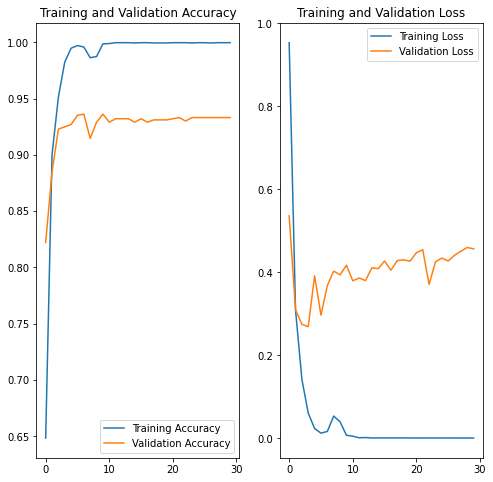

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

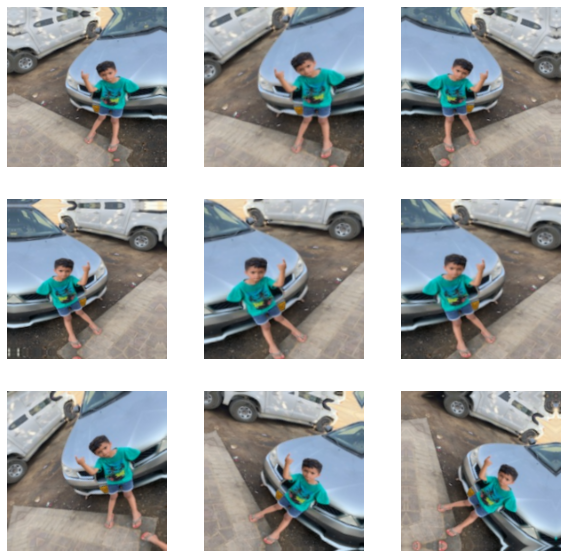

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

You will use data augmentation to train a model in a moment.

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
122/122 [==============================] - 139s 1s/step - loss: 1.5222 - accuracy: 0.3231 - val_loss: 1.2971 - val_accuracy: 0.4728
Epoch 2/15
122/122 [==============================] - 139s 1s/step - loss: 1.2032 - accuracy: 0.5062 - val_loss: 1.0322 - val_accuracy: 0.5961
Epoch 3/15
122/122 [==============================] - 139s 1s/step - loss: 0.9465 - accuracy: 0.6199 - val_loss: 0.9352 - val_accuracy: 0.6372
Epoch 4/15
122/122 [==============================] - 141s 1s/step - loss: 0.7413 - accuracy: 0.7006 - val_loss: 0.6796 - val_accuracy: 0.7276
Epoch 5/15
122/122 [==============================] - 139s 1s/step - loss: 0.6497 - accuracy: 0.7288 - val_loss: 0.6028 - val_accuracy: 0.7677
Epoch 6/15
122/122 [==============================] - 139s 1s/step - loss: 0.5613 - accuracy: 0.7745 - val_loss: 0.4811 - val_accuracy: 0.8263
Epoch 7/15
122/122 [==============================] - 139s 1s/step - loss: 0.4970 - accuracy: 0.8041 - val_loss: 0.5084 - val_accuracy: 0.8088

## Visualize training results

After applying data augmentation and `tf.keras.layers.Dropout`, there is less overfitting than before, and training and validation accuracy are closer aligned:

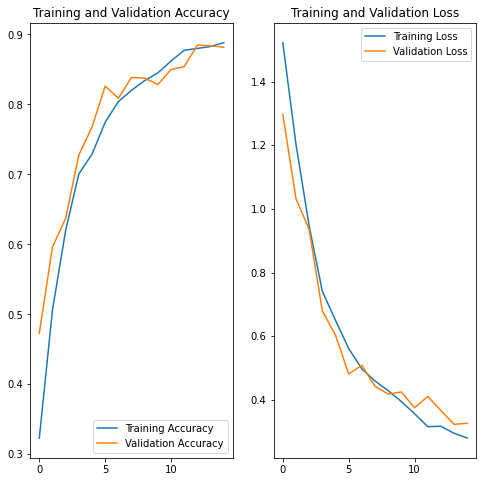

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)